In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 

In [2]:
data = pd.read_csv("emails.csv")

In [3]:
data

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
0       0       0    0               0         0         0   0    0   
1       0       0    0               0         0         0   1    0   
2       0       0    0               0         0         0   0    0   
3       0       0    0               0         0         0   0    0   
4       0       0    0               0         0         0   1    0   
...   ...     ...  ...             ...       ...       ...  ..  ...   
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
5167           0  
5168           0  
5169           1  
5170           1  
5171           0  

[5172 rows x 3002 columns]

In [4]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
X = data.iloc[:,1:3001]
y = data.iloc[:,-1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

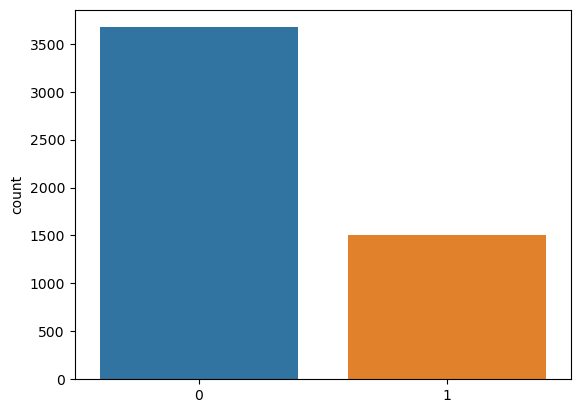

In [8]:
sns.countplot(x=y);

In [9]:
svm = SVC(C=1.0,kernel='rbf',gamma='auto')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
y_pred1 = knn.predict(X_test)
y_pred2 = svm.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred1)
accuracy_svm = accuracy_score(y_test, y_pred2)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("Support Vector Machine Accuracy:", accuracy_svm)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Accuracy: 0.8685990338164251
Support Vector Machine Accuracy: 0.9120772946859903


In [12]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Confusion Matrix:
[[645  94]
 [ 42 254]]


In [13]:
svm_report = classification_report(y_test,y_pred1)
print(svm_report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       739
           1       0.73      0.86      0.79       296

    accuracy                           0.87      1035
   macro avg       0.83      0.87      0.85      1035
weighted avg       0.88      0.87      0.87      1035

